# Sample code to illustrate Eigen value and eigenvector computations
Data set used is from the sklearn library called the iris data it contains measurements of three different species of iris flowers. 
By plotting the spread in the data, we expect to see those 3 clusters using the top eigenvectors
There are 150 samples of 4 features each.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

import pandas as pd


In [ ]:
#load a dataset on which to compute the eigenvalues and eigen vectors
iris_data = datasets.load_iris()

In [8]:

#load it into a dataframe for analysis
iris_df = pd.DataFrame(data = iris_data['data'],columns = iris_data['feature_names'])
print(iris_df.head())
print(len(iris_df))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
150


In [28]:
#obtain an input matrix to begin eigenvalue computations
#since this is a rectangular matrix of 150 samples and 4 dimensions (sepal length, width, petal length, width)
#we will form a square matrix by doing A^TA This is the first method
Amatrix=np.array(iris_df)
Atransp=np.transpose(Amatrix)
atransposea=np.dot(Atransp,Amatrix)


(4, 4)

[3.55257020e+00 1.19780429e+01 3.15454317e+02 9.20830507e+03]


<BarContainer object of 4 artists>

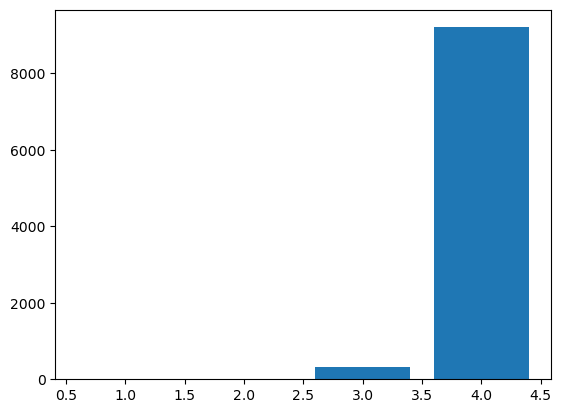

In [36]:
eig_val, eig_vec = np.linalg.eigh(atransposea)
print(eig_val)
#plt.bar(eig_val,height=10)
plt.bar(np.arange(1,5), eig_val)
#the plot shows that only 2 eigen values are dominant (linalg.eigh ranks them in ascending order)

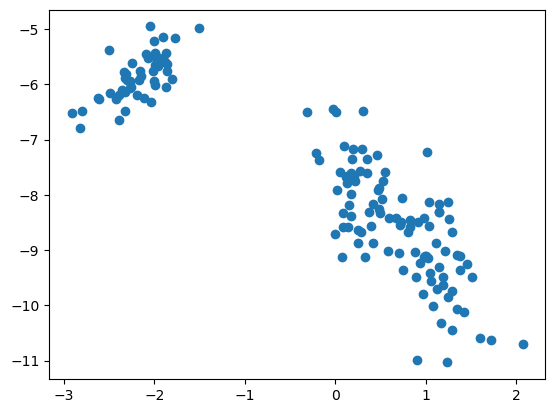

In [20]:
#retaining only the eigenvectors associated with the top 2 eigenvalues and 
# projecting the samples into the plane defined by these eigenvectors, we can see the 3 clusters present in the 
#original data corresponding to the 3 leaf classes.
proj=np.dot(Amatrix,eig_vec)
plt.scatter(proj[:,2],proj[:,3])

[0.02383509 0.0782095  0.24267075 4.22824171]


<BarContainer object of 4 artists>

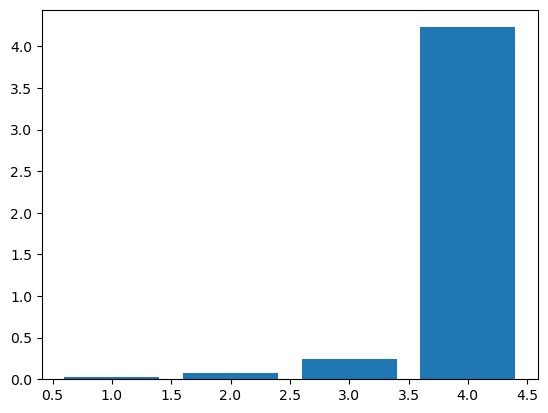

In [39]:
#the second method is doing it through the covariance matrix instead of explicit dot product so some normalization 
#differences may be present but the clusters should be aligned along axes better (may still be rotated)
#the scaling allows other eigenvalues to be more visible
cov_amatrix=np.cov(Atransp)
eig_val, eig_vec = np.linalg.eigh(cov_amatrix)
#plt.plot(eig_val)
print(eig_val)
plt.bar(np.arange(1,5), eig_val)


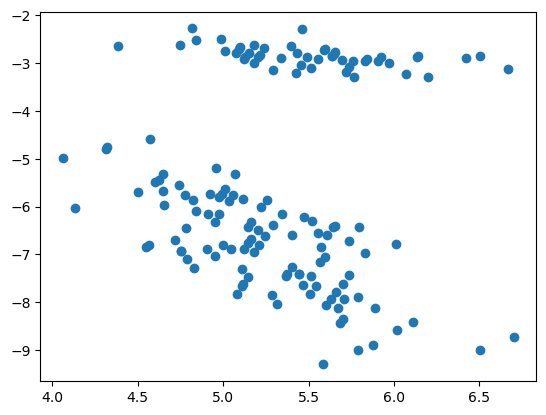

In [26]:
proj=np.dot(Amatrix,eig_vec)
plt.scatter(proj[:,2],proj[:,3])

# Statistical Shape Modeling Assignment

#the above code did not fully normalized for normal pca computations
#normally you would standardize the data by subtracting the mean and dividing by the standard deviation
#and calculating the Covariance matrix.
#the next version shows a use of statistical shape modeling in new shape generation
#downloaded a face keypoint dataset from Kaggle
#https://www.kaggle.com/datasets/drgilermo/face-images-with-marked-landmark-points?resource=download
It lists 7049 samples with 15 points on faces marked. However, not all samples have 15 points marked, so we limited it those that are complete for our analysis
Also since we are not considering alignment problem, we assume that these features are already in correspondence to build the model


In [279]:
#helper functions for use in code below
#Now build the statistical shape model 
def extract_shape_info(face_matrix):
    #computes mean, covariance, eigenvalues and vectors
    xbar=np.mean(face_matrix,axis = 0)
    cov_mat = np.cov(face_matrix.T) 
    eig_val, eig_vec = np.linalg.eigh(cov_mat)
    return xbar,eig_val,eig_vec

#build a statistical shape model and generate shapes
#x=xbar+\phiB
#\phi are the eigenvectors
#xbar is the mean 
#B is the parameter vector, the variance of bi is given by lambdai the ith eigenvalue
#max and min mode of variation per eigenvalue can be put in the range +-3\sqrt(\lambdai)
def generate_new_shape(xbar,eig_val,eig_vec,beta_coeff):
    #beta-coeff is in the range -3,3
    if (beta_coeff>3):
        beta_coeff=3
    elif (beta_coeff<-3):
        beta_coeff=-3
    xvar = xbar+np.dot(eig_vec,-beta_coeff*np.sqrt(eig_val))
    return xvar


#********** All plot functions to see the shapes and their distributions
#let's look at the spread in the data for samples
#it looks like the samples are in cartesian coordinates? Anyway, had to flip the y-axis and translate by 100 for the features to look
#like face-derived features
#since all 15 points are laid out concatenated, to get the n x 2 matrix of features per face sample, do a reshape
def plot_samples(face_matrix,sampleindex_arr):
    colsize=len(face_matrix[0])
    halfcol=int(colsize/2)
    for sampleindex in sampleindex_arr:
        sample=face_matrix[sampleindex].reshape(halfcol,2)
        plt.scatter(sample[:,0],100-sample[:,1])
        
    plt.show()

def plot_generated_sample(xvar):
    colsize=len(xvar)
    halfcol=int(colsize/2)
    sample=xvar.reshape(halfcol,2)
    plt.scatter(sample[:,0],100-sample[:,1])
    plt.show()
    
#plots the generated sample against existing
def plot_generated_sample_within_distrib(face_matrix,sampleindex_arr,xvar):
    colsize=len(face_matrix[0])
    halfcol=int(colsize/2)
    for sampleindex in sampleindex_arr:
        sample=face_matrix[sampleindex].reshape(halfcol,2)
        plt.scatter(sample[:,0],100-sample[:,1])
        
    sample=xvar.reshape(halfcol,2)
    #show the generated sample within the distribution 
    plt.scatter(sample[:,0],100-sample[:,1],facecolors='none', edgecolors='g')
    plt.show()





In [280]:
#get the data first and clean
df_faces=pd.read_csv("./data/facial_keypoints.csv")
df_clean=df_faces.dropna()
face_matrix=np.array(df_clean)

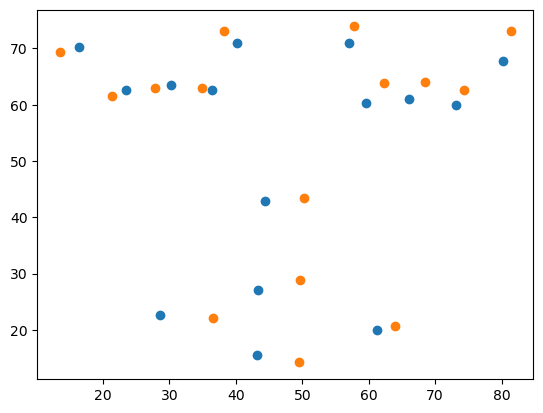

In [287]:
plot_samples(face_matrix,[0,15])

In [282]:
#extract shape
xbar,eig_val,eig_vec=extract_shape(face_matrix)

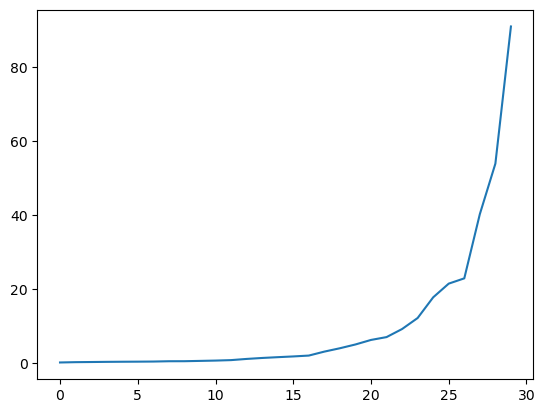

In [283]:
plt.plot(eig_val)

In [284]:
#build a new shape
#the last parameter can be varied between -3 to 3
xvar=generate_shape(xbar,eig_val,eig_vec,1.5)


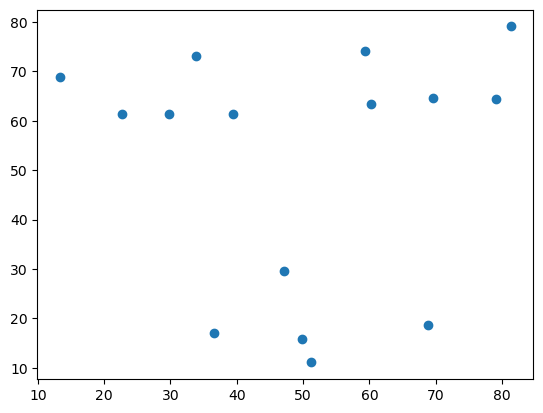

In [285]:

plot_generated_sample(xvar)


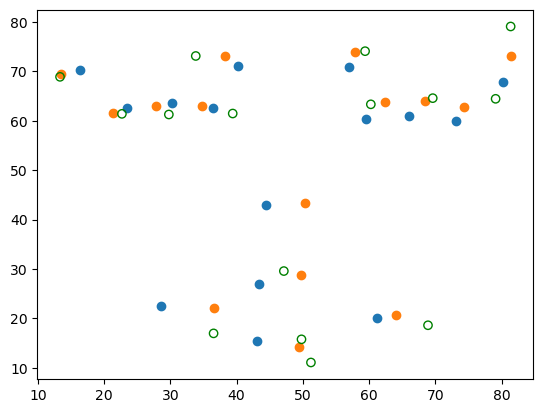

In [286]:
plot_generated_sample_within_distrib(face_matrix,[0,15],xvar)